In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

## Income classification

For this notebook you are to develop a machine learning model that will be bale to classify if an individual has a salary above 50k or less than 50k using demographic and occupation data. 

age: continuous. <br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous. <br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>
education-num: continuous. <br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>
sex: Female, Male. <br>
capital-gain: continuous. <br>
capital-loss: continuous. <br>
hours-per-week: continuous. <br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. <br>
class: >50K, <=50K **target variable**<br>

In [2]:
data_df = pd.read_csv("data/adult.csv")
data_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Do some descriptive statistics

In [5]:
data_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Look into distribution of target variable

<AxesSubplot:xlabel='income', ylabel='count'>

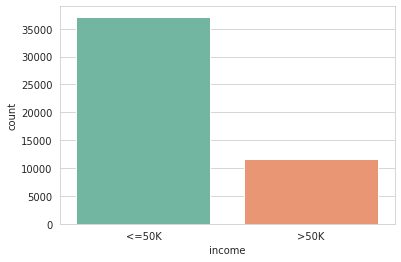

In [6]:
sns.countplot(x=data_df.income)

## Prepare Data for Modeling

In [7]:
# introduce onehot encoding for cotegoricaL vaLues
model_data = data_df.copy(deep=True)
model_data.income = data_df.income.apply(lambda x: 1 if x == '>=50' else 0)
cat_cols = model_data.select_dtypes(exclude=np.number).columns.values

enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[cat_cols])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())
display(res_df)

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_?,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_10th,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
print(cat_cols)

['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country']


In [9]:
data_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
res_df.columns[:46]

Index(['x0_?', 'x0_Federal-gov', 'x0_Local-gov', 'x0_Never-worked',
       'x0_Private', 'x0_Self-emp-inc', 'x0_Self-emp-not-inc', 'x0_State-gov',
       'x0_Without-pay', 'x1_10th', 'x1_11th', 'x1_12th', 'x1_1st-4th',
       'x1_5th-6th', 'x1_7th-8th', 'x1_9th', 'x1_Assoc-acdm', 'x1_Assoc-voc',
       'x1_Bachelors', 'x1_Doctorate', 'x1_HS-grad', 'x1_Masters',
       'x1_Preschool', 'x1_Prof-school', 'x1_Some-college', 'x2_Divorced',
       'x2_Married-AF-spouse', 'x2_Married-civ-spouse',
       'x2_Married-spouse-absent', 'x2_Never-married', 'x2_Separated',
       'x2_Widowed', 'x3_?', 'x3_Adm-clerical', 'x3_Armed-Forces',
       'x3_Craft-repair', 'x3_Exec-managerial', 'x3_Farming-fishing',
       'x3_Handlers-cleaners', 'x3_Machine-op-inspct', 'x3_Other-service',
       'x3_Priv-house-serv', 'x3_Prof-specialty', 'x3_Protective-serv',
       'x3_Sales', 'x3_Tech-support'],
      dtype='object')

In [12]:
data_df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
model_data = data_df.copy(deep=True)
model_data.income = data_df.income.apply(lambda x: 1 if x == '>=50k' else 0)
cat_cols = model_data.select_dtypes(exclude=np.number).columns.values

enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[cat_cols])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())
display(res_df)

model_data.drop(cat_cols, axis=1, inplace=True)
display(model_data.head())
model_data = pd.concat([model_data, res_df], axis=1)
display(model_data.head())


/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_?,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_10th,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,0
3,44,160323,10,7688,0,40,0
4,18,103497,10,0,0,30,0


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,x0_?,x0_Federal-gov,x0_Local-gov,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,25,226802,7,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,50,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,12,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,10,7688,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,0,0,30,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
model_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,x0_?,x0_Federal-gov,x0_Local-gov,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,25,226802,7,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,50,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,12,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,10,7688,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,0,0,30,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,40,154374,9,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,58,151910,9,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,22,201490,9,0,0,20,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# introduce onehot encoding for categorical values 
model_data = data_df.copy(deep=True)
model_data.income = data_df.income.apply(lambda x: 1 if x == '>50K' else 0)
cat_cols = model_data.select_dtypes(exclude=np.number).columns.values

enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[cat_cols])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())
display(res_df)

model_data.drop(cat_cols, axis=1, inplace=True)
display(model_data.head())
model_data = pd.concat([model_data, res_df], axis=1)
display(model_data.head())


/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_?,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_10th,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,x0_?,x0_Federal-gov,x0_Local-gov,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,25,226802,7,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,50,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,12,0,0,40,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,10,7688,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,0,0,30,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Split data into training and testing

In [17]:
X = model_data.drop("income", axis=1)
y = model_data.income
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

In [18]:
y_train.value_counts()

0    26008
1     8181
Name: income, dtype: int64

In [20]:
y_test.value_counts ()

0    11147
1     3506
Name: income, dtype: int64

## Build Model

In [22]:
import time
start_time = time.time()

param_grid = {
    "n_estimators": range(100, 150, 10),
    "max_depth": range(5,50,5),
    "min_samples_split": np.arange(.1,.6,.1),
    "min_samples_leaf": np.arange(.1,.6,.1),
    "max_features": np.arange(0.1, 0.6, .1)
}

clf = RandomForestClassifier()
clf_grid = RandomizedSearchCV(clf, param_grid, n_iter=300, n_jobs=-1)
clf_grid.fit(X_train, y_train)
# be careful in setting n_jobs=-1 this means it will use all of your processors but will speed up the run of your model
print(f"My program took {time.time() - start_time} to run")


My program took 472.73930048942566 to run


In [23]:
best_est = clf_grid.best_estimator_

y_pred = best_est.predict(X_test)
print(f"precision={precision_score(y_test, y_pred)}")
print(f"recall={recall_score(y_test, y_pred)}")
print(f"f1={f1_score(y_test, y_pred)}")
print(f"accuracy={accuracy_score(y_test, y_pred)}")

precision=0.7079002079002079
recall=0.3884768967484313
f1=0.5016574585635359
accuracy=0.815327919197434


### Model Explainability

In [25]:
clf_grid.best_estimator_.feature_importances_

feat_df = pd.DataFrame()
feat_df['feature'] = X_train.columns
feat_df['importance'] = clf_grid.best_estimator_.feature_importances_
feat_df = feat_df.sort_values('importance', ascending=False)

feat_df

,feature,importance
33,x2_Married-civ-spouse,0.466251
53,x4_Husband,0.234105
2,educational-num,0.188702
0,age,0.041985
35,x2_Never-married,0.037469
...,...,...
40,x3_Armed-Forces,0.000000
39,x3_Adm-clerical,0.000000
38,x3_?,0.000000
37,x2_Widowed,0.000000


In [30]:
list(range(100, 150, 25))

[100, 125]

<AxesSubplot:xlabel='importance', ylabel='feature'>

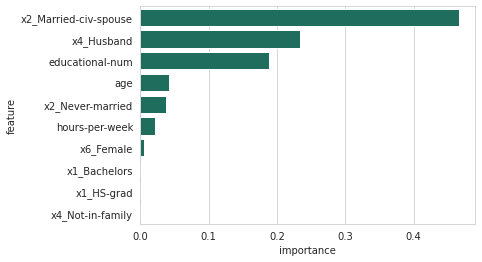

In [28]:
sns.barplot(x=feat_df.importance[:10] ,y=feat_df.feature[:10], color=dlsu_green)

In [32]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 12.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 34.5/34.5 MB 174.7 MB/s eta 0:00:010:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 39.1 MB/s eta 0:00:00m eta 0:00:01
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=564016 sha256=49ef8a82a2d9338bf5de24bc1d5e0f88f0f487f0e6ceff0b20fc01ac0d5f974a
  Stored in directory: /home/codespace/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [40]:
import shap
start_time = time.time()
explainer = shap.KernelExplainer(clf_grid.best_estimator_.predict, shap.sample(X_train))
shap_values = explainer.shap_values(X_test[:250])

print(f"My program took {time.time() - start_time} to run")

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  0%|                                                                                                                                                                                   | 0/250 [00:00<?, ?it/s]X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_w

My program took 819.0221889019012 to run


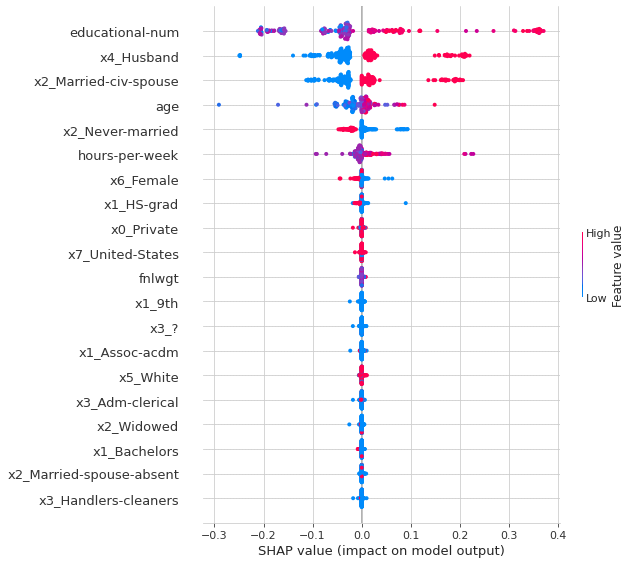

In [41]:
shap.summary_plot(shap_values, X_test.iloc[:250, :])

### Recommendation